In [218]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
from scipy.stats import randint as sp_randint
from matplotlib import pyplot as plt
import seaborn as sns

In [192]:
data = pd.read_csv('old_with_new.csv', encoding='latin1')
data = data.iloc[:,1:]

C:\Anaconda\envs\py35\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (26,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [193]:
def map_dr(result):
    if type(result) != str:
        return 0
    for item in ['Touchdown', 'Field Goal']:
        if item in result:
            return 1
        else:
            return 0

In [194]:
data.dr = data.dr.apply(map_dr)

In [195]:
def process_data(seasons):
    # Pull specific columns for the model here
    cdata = seasons[['posteam','DefensiveTeam','qtr', 'down', 'ydstogo', 'TimeUnder', 'yrdline100', 'ScoreDiff', 'PlayType', 'Season', 'dr']]


    def match(playtype):
        valid_play_types = [
        'Field Goal',
        'Pass',
        'Run',
        'QB Kneel',
        'Punt'
        ]
        return playtype in valid_play_types

    cdata = cdata[cdata.PlayType.map(match)]
    cdata = cdata[cdata['down'].isnull()==False]
    cdata = cdata[cdata['dr'].isnull() == False]
    
    x_cols = ['posteam',
             'DefensiveTeam',
             'qtr',
             'down',
             'ydstogo',
             'TimeUnder',
             'yrdline100',
             'ScoreDiff',
             'PlayType']
    X = cdata[x_cols]
    X = pd.get_dummies(X,columns = ['posteam','DefensiveTeam','PlayType'])
    X = X.values

    y = cdata['dr'].tolist()
    
    

    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(0.33), random_state=42)
    
    return X_train, X_test, y_train, y_test

In [196]:
X_train, X_test, y_train, y_test = process_data(data)

In [197]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [198]:
clf.score(X_test,y_test)

0.78234422441218221

In [199]:
rf = RandomForestClassifier()

param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 20),
              "min_samples_split": sp_randint(2, 111),
              "min_samples_leaf": sp_randint(1, 111),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

clf = RandomizedSearchCV(rf,param_distributions=param_dist, verbose=10, cv=10)

In [200]:
clf.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 
[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.777267, total=   8.4s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.8s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.779207, total=   7.5s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.7s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.781044, total=   8.0s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   25.2s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.776706, total=   7.7s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   33.3s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.777778, total=   7.6s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   41.4s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.780023, total=   7.6s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   49.5s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.782360, total=   7.8s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   57.8s remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.781799, total=   7.3s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.780318, total=   7.4s
[CV] max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  max_depth=None, criterion=entropy, min_samples_leaf=64, bootstrap=False, max_features=14, min_samples_split=28, score=0.779961, total=   7.7s
[CV] max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, max_features=15, min_samples_split=53 
[CV]  max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, max_features=15, min_samples_split=53, score=0.759455, total=   1.8s
[CV] max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, max_features=15, min_samples_split=53 
[CV]  max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, max_features=15, min_samples_split=53, score=0.759455, total=   1.8s
[CV] max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, max_features=15, min_samples_split=53 
[CV]  max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, max_features=15, min_samples_split=53, score=0.759455, total=   1.8s
[CV] max_depth=3, criterion=entropy, min_samples_leaf=54, bootstrap=False, 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.3min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [3, None], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016D02CDEB38>, 'bootstrap': [True, False], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016D067C32B0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000016D02CDEF98>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_s

In [201]:
clf.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 14,
 'min_samples_leaf': 64,
 'min_samples_split': 28}

In [203]:
clf.best_score_

0.77964639710911265

In [202]:
clf.score(X_test,y_test)

0.77874840675226165

In [166]:
clf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 16,
 'min_samples_leaf': 39,
 'min_samples_split': 90}

In [208]:
winning_rfc = RandomForestClassifier(bootstrap= True,
 criterion='entropy',
 max_depth= None,
 max_features= 16,
 min_samples_leaf= 39,
 min_samples_split= 90)

In [209]:
winning_rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=16, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=39,
            min_samples_split=90, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [210]:
winning_rfc.score(X_test,y_test)

0.78048932135418281

# ROC

In [211]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
y_test_classes = {cls:[True if c == cls else False for c in y_test ] for cls in winning_rfc.classes_.tolist()}
rfc_result = winning_rfc.predict_proba(X_test)
rfc_classes = winning_rfc.classes_.tolist()
y_predicted_probs = {cls:[item[rfc_classes.index(cls)] for item in rfc_result] for cls in rfc_classes}

In [212]:
fpr = {cls:[] for cls in rfc_classes}
tpr = {cls:[] for cls in rfc_classes}

In [213]:
pre = {cls:[] for cls in rfc_classes}
rec = {cls:[] for cls in rfc_classes}

In [214]:
for cls in rfc_classes:
    data = roc_curve(y_test_classes[cls]*1,y_predicted_probs[cls])
    fpr[cls] = data[0]
    tpr[cls] = data[1]
    data = precision_recall_curve(y_test_classes[cls]*1, y_predicted_probs[cls])
    pre[cls] = data[0]
    rec[cls] = data[1]

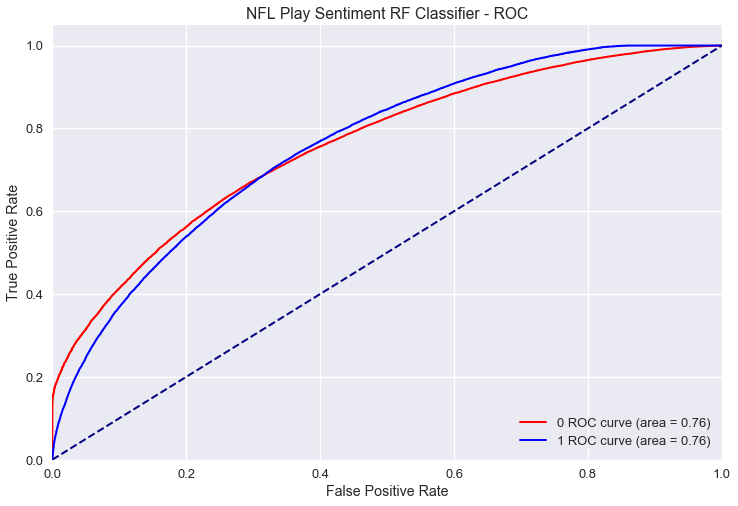

In [226]:
colors = {0:'red', 1:'blue'}
sns.set_context('talk')
plt.figure(figsize=(12,8))
lw = 2
for cls in rfc_classes:
    plt.plot(fpr[cls],tpr[cls], color=colors[cls],lw=lw,label=str(cls) + ' ROC curve (area = %0.2f)' % auc(fpr[cls],tpr[cls]))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NFL Play Sentiment RF Classifier - ROC')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

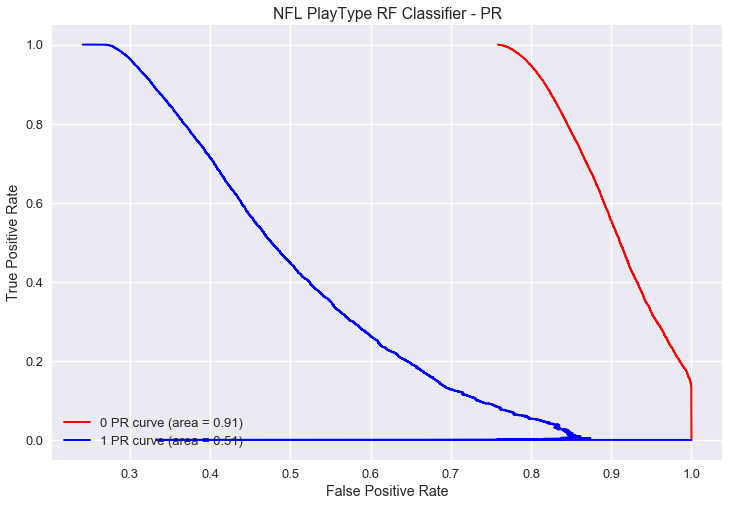

In [225]:
colors = {0:'red', 1:'blue'}
sns.set_context('talk')
plt.figure(figsize=(12,8))
lw = 2
for cls in rfc_classes:
    plt.plot(pre[cls],rec[cls], color=colors[cls],lw=lw,label=str(cls) + ' PR curve (area = %0.2f)' % auc(rec[cls],pre[cls]))
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('NFL PlayType RF Classifier - PR')
plt.legend(loc="lower left")
plt.show()